In [1]:
import stim

In [ ]:
from collections import defaultdict

circuit = stim.Circuit.from_file("circuits/QEC_hook_d=3.stim")
# circuit = stim.Circuit.from_file("circuits/hook_injection_noisy_uniform.stim")

error_dict = defaultdict(list)
two_qubit_errors = defaultdict(int)
single_qubit_errors = defaultdict(int)
spam_qubit_errors = defaultdict(int)

for detector in circuit.explain_detector_error_model_errors():
    if str(detector.dem_error_terms[0]) == 'L0':
        continue
    for e in detector.circuit_error_locations:
        noise_mechanism_ID = (e.stack_frames[0].instruction_offset, e.instruction_targets) 
        error_dict[noise_mechanism_ID].append(e.flipped_pauli_product)
        if e.instruction_targets.gate == 'DEPOLARIZE2':
            two_qubit_errors[noise_mechanism_ID] += 1
        elif e.instruction_targets.gate == 'DEPOLARIZE1' and e.instruction_targets.args[0] != 0.0015:
            single_qubit_errors[noise_mechanism_ID] += 1
        else:
            spam_qubit_errors[noise_mechanism_ID] += 1


CircuitErrorLocation {
    flipped_pauli_product: Z4[coords 2,0]*Z3[coords 1,1]
    Circuit location stack trace:
        (after 0 TICKs)
        at instruction #52 (DEPOLARIZE2) in the circuit
        at targets #1 to #2 of the instruction
        resolving to DEPOLARIZE2(0.001) 4[coords 2,0] 3[coords 1,1]
}
CircuitErrorLocation {
    flipped_pauli_product: Z4[coords 2,0]*Y3[coords 1,1]
    Circuit location stack trace:
        (after 0 TICKs)
        at instruction #52 (DEPOLARIZE2) in the circuit
        at targets #1 to #2 of the instruction
        resolving to DEPOLARIZE2(0.001) 4[coords 2,0] 3[coords 1,1]
}
CircuitErrorLocation {
    flipped_pauli_product: Y4[coords 2,0]*Z3[coords 1,1]
    Circuit location stack trace:
        (after 0 TICKs)
        at instruction #52 (DEPOLARIZE2) in the circuit
        at targets #1 to #2 of the instruction
        resolving to DEPOLARIZE2(0.001) 4[coords 2,0] 3[coords 1,1]
}
CircuitErrorLocation {
    flipped_pauli_product: Y4[coords 2,0]*Y3

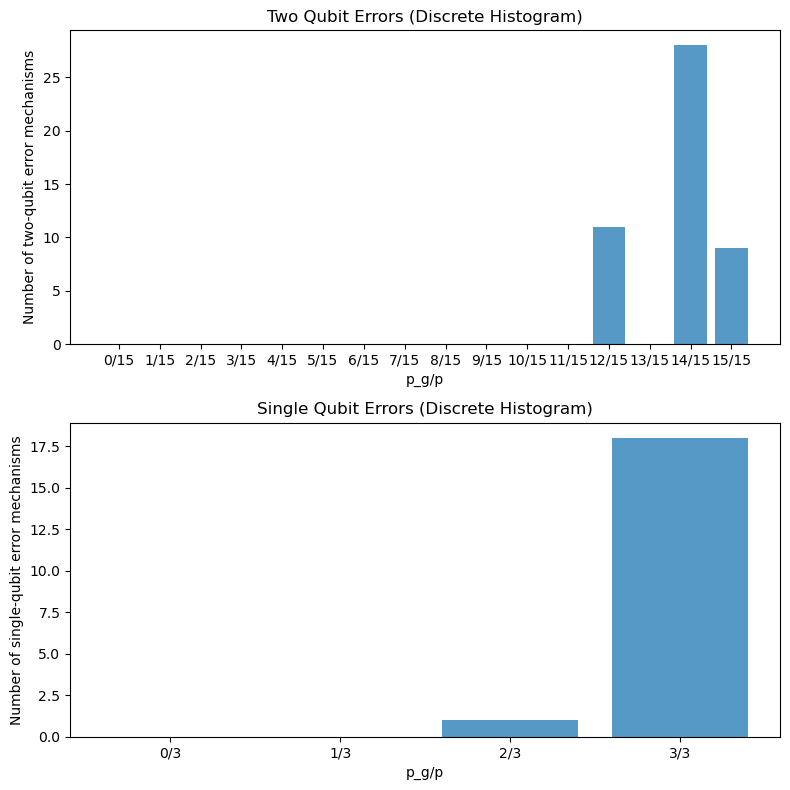

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Two qubit errors data
two_qubit_err_numbers = np.array([two_qubit_errors[key] for key in list(two_qubit_errors.keys())])
single_qubit_err_numbers = np.array([single_qubit_errors[key] for key in list(single_qubit_errors.keys())])

two_qubit_mean = np.mean(two_qubit_err_numbers)/15
single_qubit_mean = np.mean(single_qubit_err_numbers)/3

# Count occurrences for two-qubit errors
two_qubit_counts = np.bincount(two_qubit_err_numbers, minlength=16)  # Ensure we include 0 to 15
x_labels_two_qubit = [f"{i}/15" for i in range(16)]

# Plot two-qubit errors
axes[0].bar(range(16), two_qubit_counts, tick_label=x_labels_two_qubit, alpha=0.75)
axes[0].set_xlabel('p_g/p')
axes[0].set_ylabel('Number of two-qubit error mechanisms')
axes[0].set_title('Two Qubit Errors (Discrete Histogram)')

# Count occurrences for single-qubit errors
single_qubit_counts = np.bincount(single_qubit_err_numbers, minlength=4)  # Ensure we include 0 to 3
x_labels_single_qubit = [f"{i}/3" for i in range(4)]

# Plot single-qubit errors
axes[1].bar(range(4), single_qubit_counts, tick_label=x_labels_single_qubit, alpha=0.75)
axes[1].set_xlabel('p_g/p')
axes[1].set_ylabel('Number of single-qubit error mechanisms')
axes[1].set_title('Single Qubit Errors (Discrete Histogram)')


plt.tight_layout()
plt.show()